In [1]:
import pandas as pd
import numpy as np
import time 

dataset = pd.read_csv("./DataB.csv")
x = dataset.loc[:,"fea.1":"fea.784"]
target = dataset.loc[:, "gnd"]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [2]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf', random_state=42)
X_kpca = pd.DataFrame(transformer.fit_transform(X))

In [3]:
from sklearn.manifold import Isomap
time_start = time.time()
embedding = Isomap(n_components=2)
X_isomap = pd.DataFrame(embedding.fit_transform(X))
print('Isomap Time elapsed: {} seconds'.format(time.time()-time_start))

Isomap Time elapsed: 14.88198184967041 seconds


In [4]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = pd.DataFrame(embedding.fit_transform(X))

In [5]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2, random_state=42)
X_se = pd.DataFrame(embedding.fit_transform(X))

In [9]:
from sklearn.manifold import TSNE
time_start = time.time()
X_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X))
print('T-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

T-SNE Time elapsed: 24.608256101608276 seconds


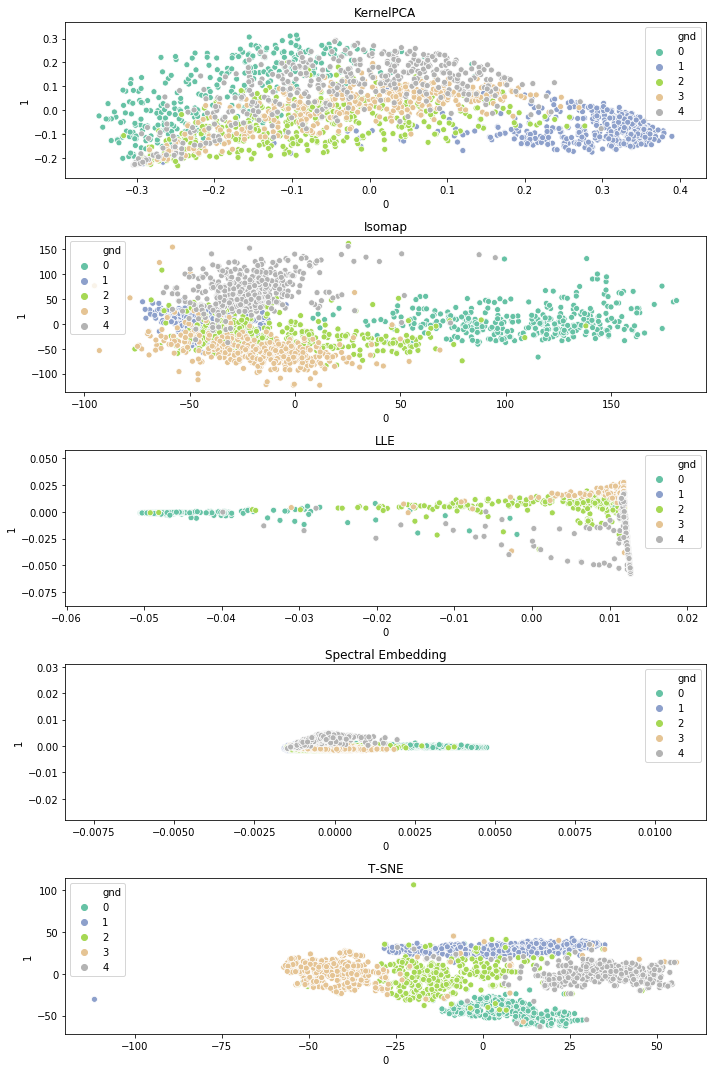

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 1, figsize=(10,15))
sns.scatterplot(x=X_kpca[0], y=X_kpca[1], hue=target, palette="Set2", ax=ax[0], legend="full")
sns.scatterplot(x=X_isomap[0], y=X_isomap[1], hue=target, palette="Set2", ax=ax[1], legend="full")
sns.scatterplot(x=X_lle[0], y=X_lle[1], hue=target, palette="Set2", ax=ax[2], legend="full")
sns.scatterplot(x=X_se[0], y=X_se[1], hue=target, palette="Set2", ax=ax[3], legend="full")
sns.scatterplot(x=X_tsne[0], y=X_tsne[1], hue=target, palette="Set2", ax=ax[4], legend="full")
ax[0].set_title("KernelPCA")
ax[1].set_title("Isomap")
ax[2].set_title("LLE")
ax[3].set_title("Spectral Embedding")
ax[4].set_title("T-SNE")
fig.tight_layout()
plt.show()

Kernel PCA was good at separating the 1. Isomap and LLE separated the 0. Spectral embedding doesnt show good separation while T-SNE was able to separate all the classes.

I am going to compare Isomap and T-SNE

Isomap reveals an underlying non-linear relationship in the data while T-SNE is used only to visualize data in 2 or 3 dimensions which is why in this case of visually comparing the separation of classes is the best algorithm.

Isomap computes geodesic distances by finding the shortest path within a connected graph while T-SNE calculates distance between points as a probability and then pushes points closer to the ones with a high probability of being close.

Isomap took 14 seconds while T-SNE took 24 this is because T-SNE has to calculate the distances between all the combinations of points and Isomap only for the shortest paths.

Taking everything into account T-SNE is the best method to separate this data using only 2 dimensions.